# TestBook 1 : GPU Underpreformance  

## Purpose 

- Testing the underperfomance/kernel death of the GPU instance in collaborate 

### Background 

- The clustering function conatined below will run locally, with half of the dataset, on a 32GB RAM Windows machine with an Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz. 

- On the collaborate GPU it will only run with a third of the data. Using half of the data kills the kernel. 

## Error 

##### As seen in Collaborate with half the data 

- The error message is not clear, nothing is outputted from cell, the kernel dies and thats all that is known.
- Need to run with a third of data 

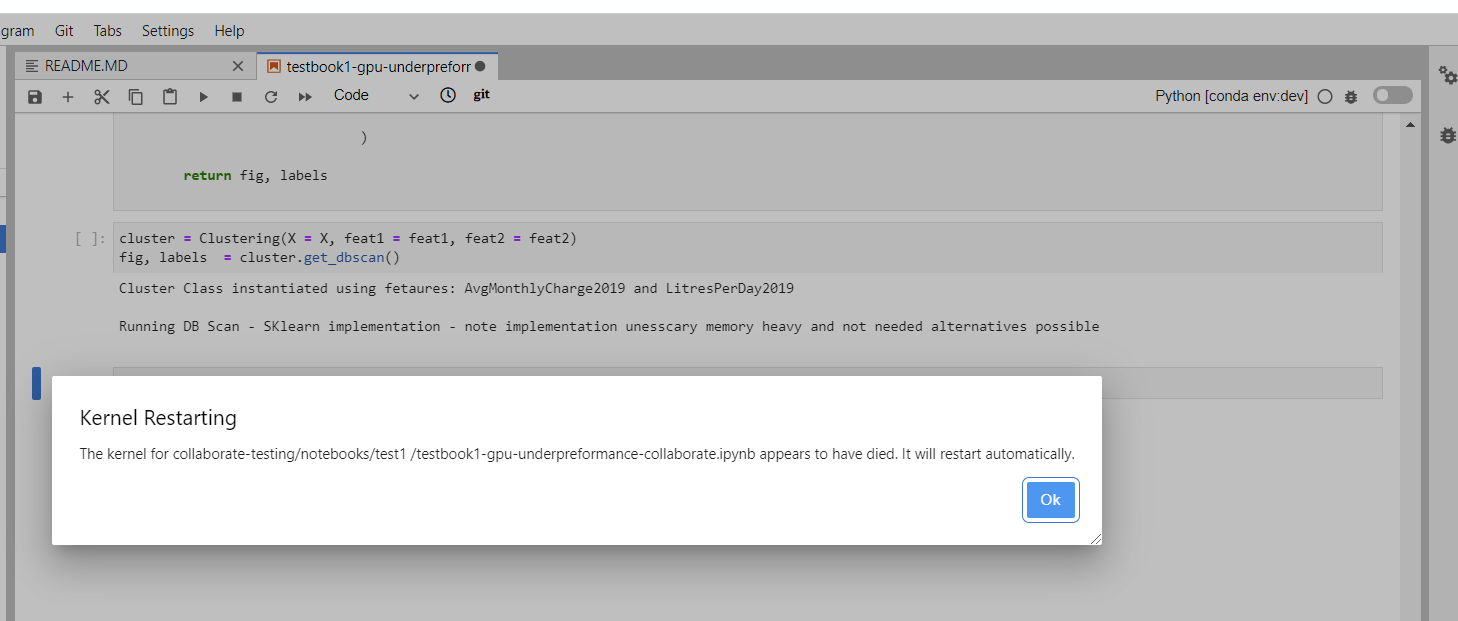

##### As seen locally with all the data (runs with half the data)

- The error message is clear would be good to see full error message in collaborate 
- Occurs when all data is run, will run with half the data
- The kenel does not die





In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [5]:
DATA_SPLIT = 2

In [6]:
dfcluster = pd.read_csv('testdata.csv')


dfcluster['LitresPerDay2019'] = dfcluster['LitresPerDay2019'].astype('int')

# fetaures for array
feat1 =  'AvgMonthlyCharge2019' 
feat2 = 'LitresPerDay2019' 

# prepare array with a split so that it fits in memory 
X = dfcluster.iloc[0:int(len(dfcluster)/DATA_SPLIT)][[feat1, feat2]].dropna(how= 'any').to_numpy()
X = StandardScaler().fit_transform(X)
X

array([[26.8075224 , 26.43891414],
       [ 0.15052892,  0.17863446],
       [-0.07277023, -0.08005641],
       ...,
       [ 0.18597837,  0.22612188],
       [-0.05723591, -0.06164836],
       [-0.13023448, -0.14808615]])

In [7]:
class Clustering():
    
    def __init__(self, X, feat1, feat2):
        """Instance defined by array to cluster"""
        self.X = X
        self.feat1 = feat1
        self.feat2 = feat2
        print(f"Cluster Class instantiated using fetaures: {feat1} and {feat2} \n") 
        # To Do : create an empty dataframe to store results of diffrennt cluster runs 
        
        
    def run_dbscan_sk(self, eps,  
                       leaf_size,  
                       min_samples,  
                       #algorithm=algorithm, 
                       #metric=metric,     
                  ):
        """Runs SKlearns DB Scan on array of instance"""
        print("Running DB Scan - SKlearn implementation - note implementation unesscary memory heavy and not needed alternatives possible \n")
        db = DBSCAN(eps=eps, 
            leaf_size = leaf_size, 
            min_samples= min_samples,
            #algorithm=algorithm, 
            #metric=metric, 
           ).fit(self.X)
        
        return db 
    
    def plot_dbscan(self, labels, core_samples_mask, n_clusters):
        """Matplotlib plot of self.run_dbscan"""
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = labels == k

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(
                xy[:, 0],
                xy[:, 1],
                "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=14,
            )

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(
                xy[:, 0],
                xy[:, 1],
                "o",
                markerfacecolor=tuple(col),
                markeredgecolor="g",
                markersize=2,
            )

        plt.title("Estimated number of clusters: %d" % n_clusters)
        plt.xlabel(f'feature 1 {self.feat1}', fontsize=12)
        plt.ylabel(f'feature 2 {self.feat2}', fontsize=12)
        
    
    def get_dbscan(self, eps = 0.3, 
               leaf_size = 30, 
               min_samples = 3, 
               #algorithm='ball_tree', 
               #metric='haversine',    
              ):
        """Runs DBSCAN for array X of class instance 
        
        currently supports sklearn DBSCAN only - abstract to implemnet others
        
        
        """
        
        db = self.run_dbscan_sk(eps = eps, 
                             leaf_size = leaf_size,  
                             min_samples= min_samples,
                            )
        
        labels = db.labels_
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        

        # Number of clusters in labels, ignoring noise if present.
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        
        print (f"Cluster results (sklearn) eps: {eps} leaf_size: {leaf_size}, min_samples: {min_samples} \n") 
        print("Estimated number of clusters: {n_clusters}")
        print("Estimated number of noise points: {n_noise}")
        # :%0.3f
        print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels) }")

    

        fig = self.plot_dbscan(labels = labels, 
                               core_samples_mask = core_samples_mask, 
                               n_clusters = n_clusters
                              
                              )

        return fig, labels 


In [8]:
cluster = Clustering(X = X, feat1 = feat1, feat2 = feat2)
fig, labels  = cluster.get_dbscan()

Cluster Class instantiated using fetaures: AvgMonthlyCharge2019 and LitresPerDay2019 

Running DB Scan - SKlearn implementation - note implementation unesscary memory heavy and not needed alternatives possible 



NameError: name 'np' is not defined